In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Load Data

In [2]:
train_data = pd.read_csv('C:/Users/user/Desktop/ML marathon/data/data-science-london-scikit-learn/train.csv', header = None)
test_data = pd.read_csv('C:/Users/user/Desktop/ML marathon/data/data-science-london-scikit-learn/test.csv', header = None)
train_Labels = pd.read_csv('C:/Users/user/Desktop/ML marathon/data/data-science-london-scikit-learn/trainLabels.csv', header = None)

In [3]:
print(f'train data shape: {train_data.shape}')
print(f'test data shape: {test_data.shape}')
print(f'train Labels shape: {train_Labels.shape}')

train data shape: (1000, 40)
test data shape: (9000, 40)
train Labels shape: (1000, 1)


In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


## Feature Engineering

#### Normalization

In [5]:
x_mean = np.mean(train_data, axis = 0).values
x_std = np.std(train_data, axis = 0).values
x = np.empty(train_data.shape)
train_data_np = train_data.to_numpy()
for i in range(train_data.shape[1]):
    for j in range(train_data.shape[0]):
        if x_std[i] != 0:
            x[j][i] = (train_data_np[j][i] - x_mean[i]) / x_std[i]

#### Principal Component Analysis

0.8264503442981035


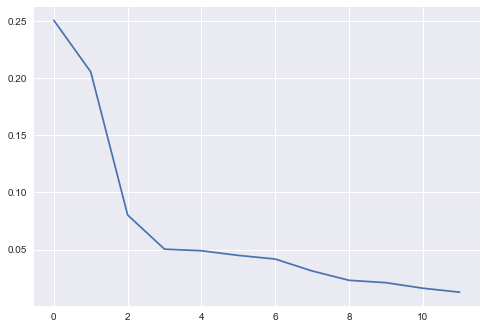

In [93]:
pca = PCA(n_components = 12)
pca.fit(train_data_np)
value = pca.explained_variance_ratio_
print(np.sum(value[:12]))
x_pca = pca.transform(train_data_np)
plt.plot(value)
plt.show()

## Training

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, np.ravel(train_Labels), test_size = 0.25, random_state = 40)

### Baseline: Logistic Regression

In [7]:
clf_lr = LogisticRegression(random_state = 20)
clf_lr.fit(x_train, y_train)
y_pred = clf_lr.predict(x_test)
print(f'train accuracy: {accuracy_score(y_train, clf_lr.predict(x_train))}')
print(f'test accuracy: {accuracy_score(y_test, y_pred)}')

train accuracy: 0.84
test accuracy: 0.804


In [8]:
print(f'cross validation score: {cross_val_score(clf_lr, x, np.ravel(train_Labels)).mean()}')

cross validation score: 0.82


### Stronger model: Random Forest Classifier

In [9]:
clf_rf = RandomForestClassifier(random_state = 20)
clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(x_test)
print(f'train accuracy: {accuracy_score(y_train, clf_rf.predict(x_train))}')
print(f'test accuracy: {accuracy_score(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.844


In [10]:
print(f'cross validation score: {cross_val_score(clf_rf, x, np.ravel(train_Labels)).mean()}')

cross validation score: 0.868


#### Hyperparameter tuning: Grid Search CV

In [11]:
n_estimators = [300, 400, 500, 600, 700, 800, 900, 1000]
max_depth = [1, 3, 5, 7, 9, 11, 13]
grid_params = dict(n_estimators = n_estimators,
                   max_depth = max_depth)
grid_cv = GridSearchCV(clf_rf, grid_params, n_jobs = -1, verbose = 1)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 10.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=20,
                               

In [12]:
print(f' best score: {grid_cv.best_score_} with HPs: {grid_cv.best_params_}')

 best score: 0.8613333333333333 with HPs: {'max_depth': 11, 'n_estimators': 500}


#### Build model with best HPs

In [13]:
clf_rf_best = grid_cv.best_estimator_
clf_rf_best.fit(x_train, y_train)
y_pred = clf_rf_best.predict(x_test)
print(f'train accuracy: {accuracy_score(y_train, clf_rf_best.predict(x_train))}')
print(f'test accuracy: {accuracy_score(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.856


In [14]:
print(f'cross validation score: {cross_val_score(clf_rf_best, x, np.ravel(train_Labels)).mean()}')

cross validation score: 0.867


### Stronger model: Gradient Boosting Classifier

In [15]:
clf_gbc = GradientBoostingClassifier(random_state = 20)
clf_gbc.fit(x_train, y_train)
y_pred = clf_gbc.predict(x_test)
print(f'train accuracy: {accuracy_score(y_train, clf_gbc.predict(x_train))}')
print(f'test accuracy: {accuracy_score(y_test, y_pred)}')

train accuracy: 0.9973333333333333
test accuracy: 0.848


In [16]:
print(f'cross validation score: {cross_val_score(clf_gbc, x, np.ravel(train_Labels)).mean()}')

cross validation score: 0.8619999999999999


#### Hyperparameter tuning: Grid Search CV

In [17]:
n_estimators = [300, 400, 500, 600, 700, 800, 900, 1000]
max_depth = [1, 3, 5, 7, 9, 11, 13]
grid_params = dict(n_estimators = n_estimators,
                   max_depth = max_depth)
grid_cv = GridSearchCV(clf_gbc, grid_params, n_jobs = -1, verbose = 1)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  9.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [18]:
print(f' best score: {grid_cv.best_score_} with HPs: {grid_cv.best_params_}')

 best score: 0.8813333333333333 with HPs: {'max_depth': 5, 'n_estimators': 300}


#### Build model with best HPs

In [19]:
clf_gbc_best = grid_cv.best_estimator_
clf_gbc_best.fit(x_train, y_train)
y_pred = clf_gbc_best.predict(x_test)
print(f'train accuracy: {accuracy_score(y_train, clf_gbc_best.predict(x_train))}')
print(f'test accuracy: {accuracy_score(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.856


In [20]:
print(f'cross validation score: {cross_val_score(clf_gbc_best, x, np.ravel(train_Labels)).mean()}')

cross validation score: 0.882


## Submmision

#### Normalization

In [22]:
test_mean = np.mean(test_data, axis = 0).values
test_std = np.std(test_data, axis = 0).values
x_test = np.empty(test_data.shape)
test_data_np = test_data.to_numpy()
for i in range(test_data_np.shape[1]):
    for j in range(test_data_np.shape[0]):
        if test_std[i] != 0:
            x_test[j][i] = (test_data_np[j][i] - test_mean[i]) / test_std[i]

#### Prediction

In [24]:
y_predictions_lr = clf_lr.predict(x_test)
y_predictions_rf = clf_rf.predict(x_test)
y_predictions_rf_best = clf_rf_best.predict(x_test)
y_predictions_gbc = clf_gbc.predict(x_test)
y_predictions_gbc_best = clf_gbc_best.predict(x_test)

In [26]:
y_predictions_lr.shape

(9000,)

In [97]:
clf_rf_pca = RandomForestClassifier(random_state=40)
clf_rf_pca.fit(x_pca, np.ravel(train_Labels))
y_predictions_rf_pca = clf_rf_pca.predict(pca.transform(test_data))

In [98]:
submit = pd.DataFrame({'Id':range(1, 9001), 'solution':y_predictions_rf_pca})
submit.head()

,Id,solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [99]:
submit.to_csv('C:/Users/user/Desktop/ML marathon/submission/sklearn_rf_pca.csv', sep = ',', encoding = 'utf-8', index = False)